# Perceptron

# Q.1

### Importing Libraries

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.datasets import make_blobs
import seaborn as sns

### Using the make blobs function in sklearn generate a dataset of 100 points with two classes.

In [32]:
# generate 100 samples with 2 features and 2 centers
# centers represent the number of classes in the dataset
# center_box is a tuple that defines the minimum and maximum coordinates for the cluster centers
# random_state is a parameter that controls the random number generator used by the function
X, y = make_blobs(n_samples=100, centers=2, n_features=2,
                  center_box=(0, 10), random_state=1000)


### Changing the label for class 0 to -1

In [33]:
y[y == 0] = -1

In [34]:
print(np.unique(y))

[-1  1]


### Visualize the generated data using scatter plot.

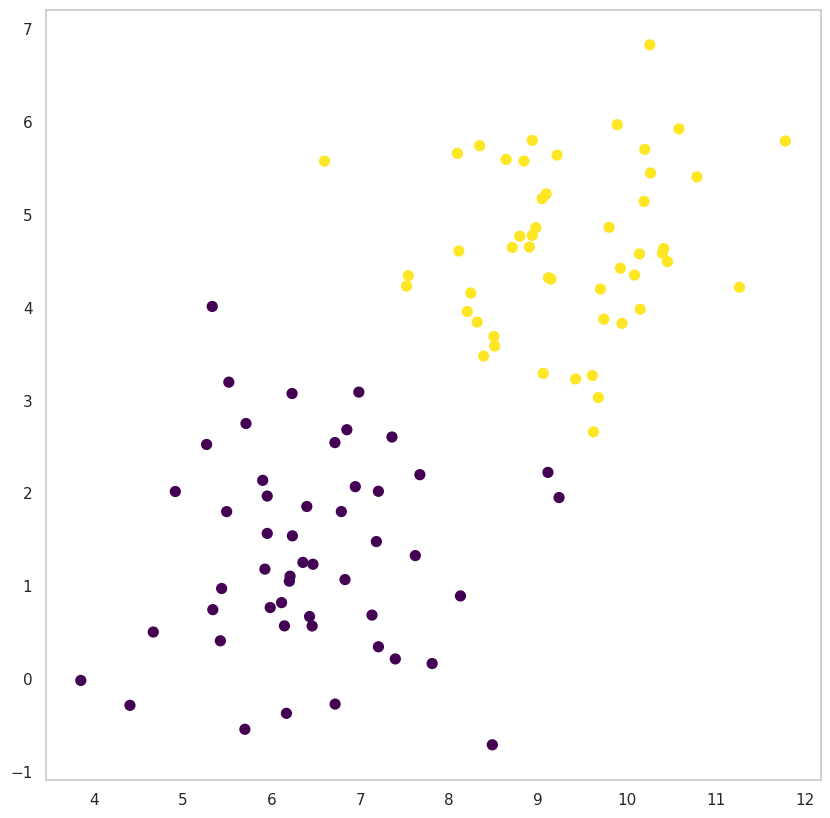

In [35]:
# Plot the data
sns.set()  # Set the style of the plot
sns.set_style("whitegrid")  # Set the style of the plot
# set figure size
# Create a figure object and set the size of the figure
plt.figure(figsize=(10, 10))
# turn grid off
plt.grid(False)  # Turn off the gridlines
# turn scale off
# Create a scatter plot of the data points
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
plt.show()  # Show the plot

### Augment the data with an extra column of 1's

We are augmenting the data by adding an extra column of 1's to the feature matrix X. This is because the perceptron algorithm works by finding a hyperplane that separates the two classes in the feature space. Mathematically, this hyperplane is represented by the equation:



w1 * x1 + w2 * x2 + ... + wn * xn + b = 0

where w1, w2, ..., wn are the weights of the hyperplane and b is the bias term. The feature vector x = [x1, x2, ..., xn] represents a data point in the feature space.

When we add an extra column of 1's to the feature matrix, we are effectively adding a new feature x0 to each data point, where x0 = 1. This allows us to represent the bias term b as a weight wn+1 corresponding to the extra feature x0, and the hyperplane equation becomes:


In [36]:
# lets augument the data
X = np.c_[X, np.ones(X.shape[0])]

In [37]:
print(X[:10])

[[10.0850635   4.35004635  1.        ]
 [ 6.11302538  0.81966888  1.        ]
 [ 9.23554171  1.95209395  1.        ]
 [ 7.519972    4.23150309  1.        ]
 [ 6.2010604   1.05058773  1.        ]
 [ 7.13093136  0.68540191  1.        ]
 [10.1928101   5.14329277  1.        ]
 [ 8.20326639  3.95689153  1.        ]
 [ 7.61813666  1.32673975  1.        ]
 [ 5.95173163  1.96831913  1.        ]]


1. The perceptron algorithm updates the weights based on whether the predicted class label matches the actual class label for each training instance. If the prediction is incorrect, the algorithm updates the weights by adding the product of the learning rate (eta), the input feature vector (x), and the target class label (y).

2. The errors list keeps track of the number of misclassifications made in each epoch. If there are no misclassifications in an epoch, the algorithm terminates early, as the decision boundary has successfully separated the two classes.




### Perceptron Algorithm Class

Perceptron is a linear machine learning algorithm for binary classification tasks

What does our update rule say? The dot product x⋅w is just the perceptron’s prediction based on the current weights (its sign is the same with the one of the predicted label). The expression y(x⋅w) can be less than or equal to 0 only if the real label y is different than the predicted label ϕ(x⋅w). So, if there is a mismatch between the true and predicted labels, then we update our weights: w = w+yx; otherwise, we let them as they are.



In [38]:
# Define the Perceptron class
class Perceptron:

    # Define the constructor with two hyperparameters: learning rate (eta) and number of epochs
    def __init__(self, learning_rate=0.1, epochs=1000000):
        self.learning_rate = learning_rate
        self.epochs = epochs

    # Define the fit method that trains the model on the given input data (X) and target labels (y)
    # It also takes an optional parameter to set the initial weights (w_init)
    def fit(self, X, y, w_init=None):

        # If initial weights are not provided, set them to zeros
        if w_init is None:
            w = np.zeros(X.shape[1])
        else:
            w = w_init

        # Create empty lists to store errors and weights for each epoch
        error_list = []
        weights_list = []

        # Iterate over each epoch
        for epoch in range(self.epochs):
            mismatch = 0

            # Iterate over each input data point (x) and its corresponding target label (y)
            for i, x in enumerate(X):

                # Calculate the dot product of input data point and weights
                # If the result is greater than or equal to zero, the predicted label is 1; otherwise, it is -1
                if (np.dot(X[i], w) * y[i]) <= 0:

                    # If predicted label does not match the actual label, update the weights
                    # If the actual label is 1, increase the weights by learning rate (eta) times input data point (x)
                    # If the actual label is 0, decrease the weights by learning rate (eta) times input data point (x)
                    w = w + self.learning_rate * x * (1 if y[i] == 1 else -1)
                    mismatch += 1

            # Store the number of errors and the updated weights for each epoch
            error_list.append(mismatch)
            weights_list.append(w)

            # Print the error and epoch number every 10 epochs
            if epoch % 10 == 0:
                print(f"Iteration {epoch} with error = {error_list[-1]}")

            # Stop the training if there are no errors in the current epoch
            if mismatch == 0:
                break

        # Print the final error and epoch number
        print(f"Iteration {epoch} with error = {error_list[-1]}")

        # Return the final weights and the list of errors for each epoch
        return weights_list, error_list


### Training a Perceptron Model on Input Data with Binary Labels

In [39]:
# Set the learning rate and maximum number of iterations
learning_rate = 0.1
max_iterations = 1000

# Create an instance of the Perceptron class with the specified learning rate and maximum iterations
perceptron_obj = Perceptron(learning_rate, max_iterations)

# Fit the Perceptron model to the input data (X) and target labels (y) using the fit() method of the Perceptron class
# The fit() method returns the final weights and a list of errors for each epoch
weights, errors = perceptron_obj.fit(X, y)

Iteration 0 with error = 42
Iteration 10 with error = 15
Iteration 20 with error = 17
Iteration 30 with error = 12
Iteration 40 with error = 10
Iteration 50 with error = 10
Iteration 60 with error = 2
Iteration 70 with error = 0
Iteration 70 with error = 0


In [40]:
print(len(weights))
# print(len(errors))

71


## Visualization

### Plot decision boundaries for a binary classification problem and improve the visual appearance

In [41]:
# set up plot parameters
columns = 4
rows = len(weights) // columns + 1
# create a figure with a grid of subplots
fig, ax = plt.subplots(rows, columns, figsize=(40, 35*rows/columns))
fig.suptitle('Decision Boundaries', fontsize=30)  # add a title to the figure

# plot each decision boundary
for i in range(len(weights)):
    w = weights[i]
    x1 = np.linspace(0, 15, 2)
    x2 = -(w[0] * x1 + w[2]) / w[1]  # compute the decision boundary line
    ax[i//columns, i % columns].plot(x1, x2)  # plot the decision boundary

    # plot the data
    # plot the data points
    ax[i//columns, i %
        columns].scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
    # add an x-axis label
    ax[i//columns, i % columns].set_xlabel('Feature 1', fontsize=15)
    # add a y-axis label
    ax[i//columns, i % columns].set_ylabel('Feature 2', fontsize=15)
    # turn grid off
    ax[i//columns, i % columns].grid(False)  # remove the grid


# remove empty subplots
for i in range(rows):
    for j in range(columns):
        if ax[i, j].has_data() == False:
            # hide the subplot if it doesn't have any data
            ax[i, j].axis('off')

# adjust spacing and layout
# adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.tight_layout()  # adjust the layout to make all elements fit
plt.show()  # display the plot

### Visualization of Perceptron Model's Decision Boundary on 2D Dataset

### FINAL PLOT: PERCEPTRON ALGORITHM

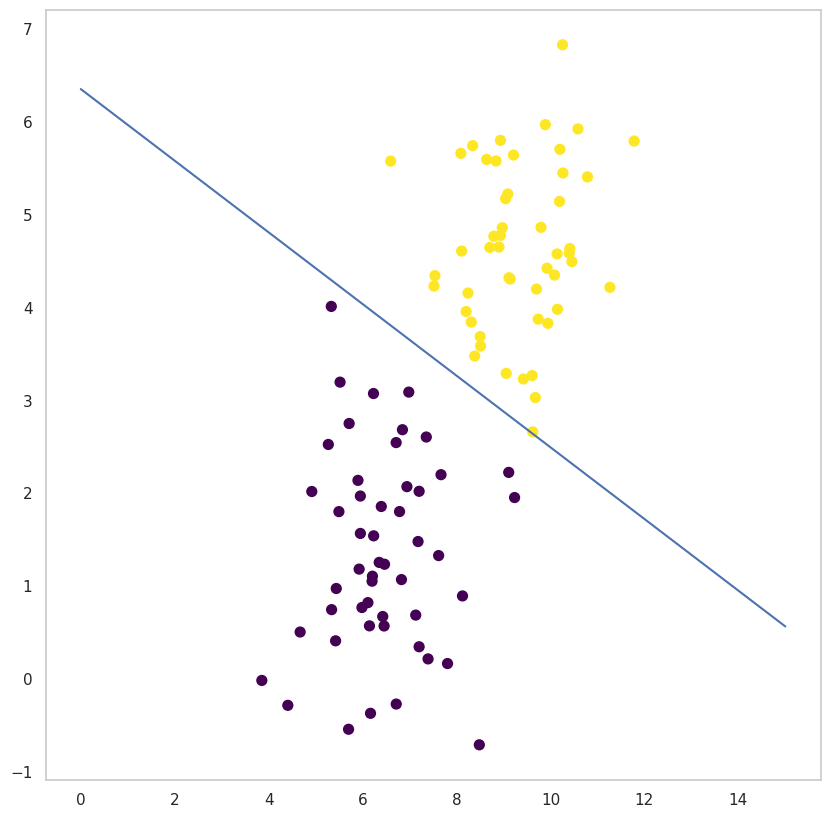

In [42]:
# This code  generates a scatter plot of a two-dimensional dataset, 
# where each sample is colored based on its class label. 
# Additionally, it plots the decision boundary of the Perceptron model learned using the perceptron function.

plt.figure(figsize=(10, 10))
plt.grid(False)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
w = weights[-1]
x1 = np.linspace(0, 15, 2)
x2 = -(w[0] * x1 + w[2]) / w[1]
plt.plot(x1, x2)
plt.show()
